In [1]:
import pandas as pd
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import numpy as np
import re
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB

df=pd.read_excel("D:/FND/Train1.xlsx")
print(df.shape)

(20800, 5)


In [2]:
#Display the shape of Train DataFrame
Train=df

print(Train.shape)

(20800, 5)


In [3]:
#Finding the null values in Train DataFrame
print(Train.isnull().sum())

id           0
title      558
author    1957
text       120
label        0
dtype: int64


In [4]:
#Droping the unnecessary column from the Data Frame
#Train.drop("label",axis=1,inplace=True)

print(Train.columns)
#Drop all Rows containing null values corresponding toi text column
Train.dropna(subset="text",axis=0,inplace=True)
print(Train.isnull().sum())
print(Train.shape)

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')
id           0
title      558
author    1915
text         0
label        0
dtype: int64
(20680, 5)


In [5]:
# Check for duplicates in each column
a=["a"]#Creating a list data type variable because list can grow and shrink dynamicly 
for col in Train.columns:# Creating a for loop to identify all duplicate values in each column at once
  a=Train[col].duplicated().sum()
  print("Duplicate values in this column :",a)
#Creating a new dataframe Test1 and Train1 without id column from Test and Train1
Train1=Train.drop("id",axis=1)
#Droping duplicate rows from specific columns and dataframe Train1 without effecting objective

Train1=Train1.drop_duplicates('text')
print(Train1.shape)
df=Train1
for col in Train1.columns:# Creating a for loop to identify all duplicate values in each column at once
  a=Train1[col].duplicated().sum()
  print("Duplicate values in this column :",a)

Duplicate values in this column : 0
Duplicate values in this column : 993
Duplicate values in this column : 16484
Duplicate values in this column : 301
Duplicate values in this column : 20678
(20379, 4)
Duplicate values in this column : 876
Duplicate values in this column : 16188
Duplicate values in this column : 0
Duplicate values in this column : 20377


In [6]:
#Replacing the null values with some character values
df=df.fillna("A")
#Summarizing all text data in a single column
df["tol"]=df['title']+df['author']+df['text'] #df is a dataframe on which datacleaning is not performed
Train1["Total"]=Train1['title']+Train1['author']+Train1['text']#Train1 is a dataframe on which datacleaning is performed
print(Train1.iloc[0:2,3])#Accessing the data from a dataframe using iloc()
print(Train1.columns)

0    1
1    0
Name: label, dtype: int64
Index(['title', 'author', 'text', 'label', 'Total'], dtype='object')


In [ ]:
#Distingusing between real and fake news on basis of label values corrosponding to tol column in df
#Creating tokens 
real_words=" "
fake_words=" "
for val in df[df["label"]==1].tol:
      tokens=val.split()
      for i in range(len(tokens)):
            tokens[i]=tokens[i].lower()
      real_words += " ".join(tokens)+' '      
for val in df[df["label"]==0].tol:
      tokens=val.split()
      for i in range(len(tokens)):
            tokens[i]=tokens[i].lower()
      fake_words += " ".join(tokens)+' '        
print(type(real_words))  
print(len(real_words))        

In [57]:
#usein Regex:
r_w=re.sub(r'[^\w\s]',' ',real_words)
f_w=re.sub(r'[^\w\s]',' ',fake_words)
print(len(r_w))

38819419


In [58]:
#Using stopwords from nltk.corpus
stopwords1=stopwords.words("English")


In [59]:
#updating list stopwords with few words that doesnot holding much importance for data visaualization
extra_stopwords=['u','one','also','would','time','us','said']
stopwords1.extend(extra_stopwords)
stopw=set(stopwords1)

In [60]:
#nltk.download('wordnet')
#performing lemmatization
#converting strings r_w and f_w into a list
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
#Converting string into list
r_w=r_w.split()
f_w=f_w.split()

filter_Rwords = []
filter_Fwords = []

# Lemmatize and store the results
for Rword in r_w:
    filter_Rwords.append(lemmatizer.lemmatize(Rword).lower())

for Fword in f_w:
    filter_Fwords.append(lemmatizer.lemmatize(Fword).lower())

# Combine lemmatized words into strings if needed
r_w = ' '.join(filter_Rwords)
f_w = ' '.join(filter_Fwords)


      

In [61]:
#Creating wc variable to store the layout and functions to be performed for creating a wordcloud
#updating list stopwords with few words that doesnot holding much importance for data visaualization
extra_stopwords=['u','one','also','would','time','us','said','wa','ha']
stopwords1.extend(extra_stopwords)
stopw=set(stopwords1)
wc=WordCloud(background_color="white",stopwords=stopw).generate(r_w)
print(stopw)

{'they', 'both', 'over', 'but', 'very', 'will', 'shan', 'would', 're', 'in', 'm', "you'll", 'needn', 'has', 'these', 'don', 'all', "wouldn't", 'whom', 'doesn', 'had', 'such', 'of', 'haven', 'won', 'mightn', 'u', 'isn', 'for', 'or', 'again', 'it', 'its', 'my', 'once', 'some', "should've", "needn't", "that'll", 'now', 'an', 'few', 'wouldn', 'shouldn', 'down', 'his', 'who', 'me', 'when', 'below', 'weren', 'o', 'at', 'just', 'hasn', 'her', 'ha', 'themselves', 'against', 'most', 'wa', 'if', 'us', 'one', 'there', "you've", 've', "haven't", 'does', 'under', 'what', 'doing', 'and', 'into', 'yours', 'own', 'where', 'were', 'was', 'during', 'those', 'off', 'nor', 'as', 'why', "weren't", "shan't", 'from', 'you', "didn't", 'with', 'up', 'than', "mightn't", 'out', 'said', 'are', 'y', 'their', 'can', 'because', "wasn't", 'mustn', 'aren', "it's", 'being', 'no', "couldn't", 'didn', 'too', 'have', 'him', 'we', 'while', 'hadn', 'ours', 'yourself', 's', "hasn't", "shouldn't", 'each', "don't", 'this', "ar

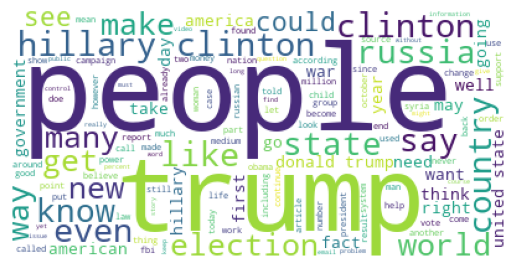

In [62]:
#using plt(pyplot) module to design the layout and display the WordColud
plt.imshow(wc)
plt.axis('off')
plt.show()


In [63]:
#Total lemmatized words
l_word=r_w+f_w
print("The lenth of r_w list :",len(r_w),"\nThe lenth of f_w list :",len(f_w),"\nSum of both lenth is :",len(l_word))

The lenth of r_w list : 37262242 
The lenth of f_w list : 51911893 
Sum of both lenth is : 89174135


In [64]:
#Reducing noice from the text data. To increase it's efficiency(Text preprocessing)
Train1=Train1.fillna("A")
stop_words=stopwords.words('English')
for index,row in Train1.iterrows():
      filter_sentence=''
      sentence=row['Total']
      sentence=re.sub(r'[^\w\s]','',sentence)# removes all punctuation and special characters from the sentence 
      words=nltk.word_tokenize(sentence)#Tokenization
      words=[w for w in words if not w in stop_words]#removes all stopwords
      for word in words:
            filter_sentence=filter_sentence+' '+str(lemmatizer.lemmatize(word)).lower()#Perform lemmatization
      Train1.loc[index,'Total']=filter_sentence      

In [65]:

#Tf-idf vetorization using counter vectorizer and tf_idf transformer(NLP)
Train1=Train1.drop_duplicates('Total')
Train1.to_excel("Train1.xlsx")
Xt=Train1['Total']
Yt=Train1['label']
count_vectorizer=CountVectorizer()
count_vectorizer.fit_transform(Xt)
freq_term_matrix=count_vectorizer.transform(Xt)
tfidf=TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix=tfidf.transform(freq_term_matrix)
tf_idf_matrix.shape

(18009, 197660)

In [66]:
#Creating a model Train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(tf_idf_matrix,Yt,random_state=2)

In [67]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(C=1e5)#"C=1e5" is parameter used to regularize(It is a technic use to handle the overfiting problem occure due to large number of independent varable in X_Train variable)
logreg.fit(x_train,y_train)
pred1=logreg.predict(x_test)
pred2=logreg.predict(x_train)
print("The Accuracy of Train data :",logreg.score(x_train,y_train))
print("The Accuracy of Test Data :",logreg.score(x_test,y_test))



The Accuracy of Train data : 0.9997778764993336
The Accuracy of Test Data : 0.9664667999111703


In [ ]:
#Displaying the accuraccy result shown by train and test Data_set
categories = ['Train','Test']
x=np.arange(len(categories))
a=logreg.score(x_train,y_train)
b=logreg.score(x_test,y_test)
c=1/100
width=0.5
d=int(a/c)
e=int(b/c)
f=str(d)+'%'
g=str(e)+'%'
val=[f,g]
values = [d,e]
plt.bar(x,values,width=width, color=['green','blue'],label=val)
plt.xticks(x,categories)
plt.legend()
plt.title("Test_Train")

plt.show()

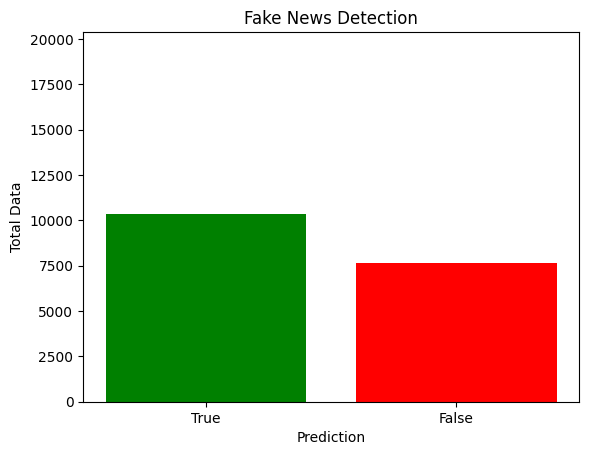

In [68]:
#Creating Bar-Graph to represent True_V_False Data
pred3=np.concatenate((pred1,pred2),axis=0)
tru=[]
fals=[]
for i in pred3:
      if i==0:
            tru.append(i)
      else:
            fals.append(i)
            
true=np.array(tru)
false=np.array(fals)
truelen=float(len(true))
falselen=float(len(fals))
labels = ['True', 'False']
scores = [truelen, falselen]

plt.bar(labels, scores, color=['green', 'red'])
plt.ylabel('Total Data')
plt.xlabel('Prediction')
plt.title('Fake News Detection')
plt.ylim(0,20370)  # Set y-axis limit from 0 to 1
plt.show()

[[2515   83]
 [  68 1837]]


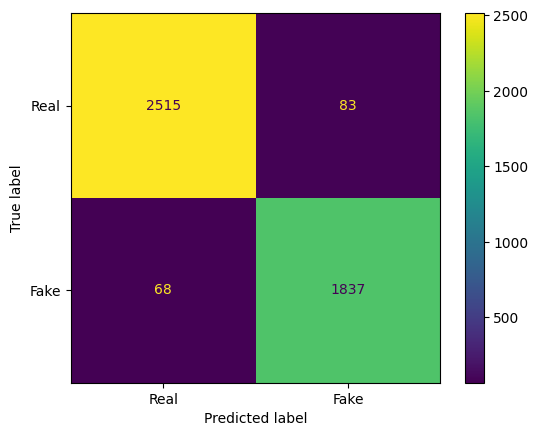

In [69]:
#Greating confustion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
logreg.classes_
cm=confusion_matrix(y_test,pred1,labels=logreg.classes_)
print(cm)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Real','Fake'])
cm_display.plot()

Accuracy of Train_Data : 0.7555901081001036
Accuracy of Test_Data : 0.713302242949145
[[2597    1]
 [1290  615]]


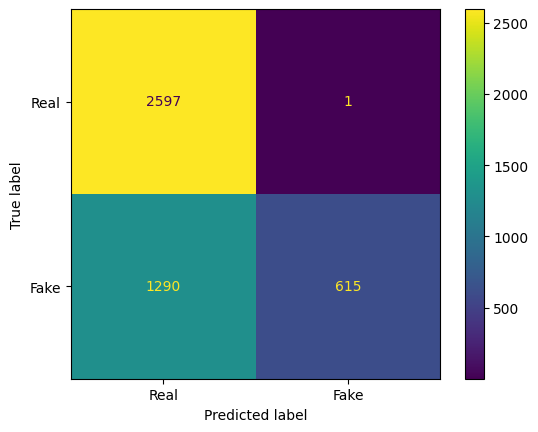

In [70]:
#Creating a MultinomialNB
from sklearn.naive_bayes import MultinomialNB
NB=MultinomialNB()
NB.fit(x_train,y_train)
pred=NB.predict(x_test)
print("Accuracy of Train_Data :",NB.score(x_train,y_train))
print("Accuracy of Test_Data :",NB.score(x_test,y_test))
c_m=confusion_matrix(y_test,pred)
print(c_m)
cm_disp=ConfusionMatrixDisplay(confusion_matrix=c_m,display_labels=['Real','Fake'])
cm_disp.plot()

In [71]:
from sklearn.pipeline import Pipeline
from joblib import dump, load
from sklearn import linear_model

In [72]:
pipeline = Pipeline([
      ('vect',CountVectorizer()),
      ('tfidf',TfidfTransformer(norm='l2')),
      ('logr', linear_model.LogisticRegression(C=1e5)),
])

In [73]:
x1_train,x1_test,y1_train,y1_test=train_test_split(Xt,Yt,random_state=2)

In [74]:
pipeline.fit(x1_train,y1_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('logr', LogisticRegression(C=100000.0))])

In [76]:
pipeline.predict([" house dem aide we didnt even see comeys letter until jason chaffetz tweeted itdarrell lucushouse dem aide we didnt even see comeys letter until jason chaffetz tweeted it by darrell lucus october 30 2016 subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commonsby license with apology keith olbermann doubt worst person the world weekfbi director james comey but according house democratic aide look like also know secondworst person well it turn comey sent nowinfamous letter announcing fbi looking email may related hillary clintons email server ranking democrats relevant committee didnt hear comey they found via tweet one republican committee chairman as know comey notified republican chairman democratic ranking member house intelligence judiciary oversight committee agency reviewing email recently discovered order see contained classified information not long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed the fbi learned existence email appear pertinent investigation case reopened jason chaffetz jasoninthehouse october 28 2016 of course know case comey actually saying reviewing email light unrelated casewhich know anthony weiners sexting teenager but apparently little thing fact didnt matter chaffetz the utah republican already vowed initiate raft investigation hillary winsat least two year worth possibly entire term worth apparently chaffetz thought fbi already work himresulting tweet briefly roiled nation cooler head realized dud but according senior house democratic aide misreading letter may least chaffetz sin that aide told shareblue bos democrats didnt even know comeys letter timeand found checked twitter democratic ranking members relevant committee didnt receive comeys letter republican chairmen in fact democratic ranking members receive chairman oversight government reform committee jason chaffetz tweeted made public so let see weve got right the fbi director tell chaffetz gop committee chairman major development potentially politically explosive investigation neither chaffetz colleague courtesy let democratic counterpart know instead according aide made find twitter there already talk daily kos comey provided advance notice letter chaffetz republicans giving time turn spin machine that may make good theater nothing far even suggests case after nothing far suggests comey anything grossly incompetent tonedeaf what suggest however chaffetz acting way make dan burton darrell issa look like model responsibility bipartisanship he didnt even decency notify ranking member elijah cummings something explosive if doesnt trample basic standard fairness i dont know granted likely chaffetz answer he sits ridiculously republican district anchored provo orem cook partisan voting index r25 gave mitt romney punishing 78 percent vote 2012 moreover republican house leadership given full support chaffetz planned fishing expedition but doesnt mean cant turn hot light after textbook example house become republican control and also second worst person world about darrell lucus darrell 30something graduate university north carolina considers journalist old school an attempt turn member religious right college succeeded turning religious right worst nightmarea charismatic christian unapologetic liberal his desire stand scared silence increased survived abusive threeyear marriage you may know daily kos christian dem nc follow twitter darrelllucus connect facebook click buy darrell mello yello connect"])

array([1])

In [78]:
filename='pipeline.sav'
dump(pipeline,filename)

['pipeline.sav']

In [88]:
loaded_model=load(filename)
Result=["A"]
res=pipeline.predict([" rob reiner trump is mentally unstable breitbartpam keysunday msnbcs am joy actor director rob reiner accused president donald trump mentally unstable reiner said its scary scary look capacity cyber warfare know stuxnet people dont know able weaponize know cyber warfare actually go blow centrifuge iran thats scare we dont anybody helm country right he know i hate say dont want use word mentally ill mentally unstable man going take charge next attack if first attack going election know happened bomb blew new york everybody would going crazy continued thats happened he blew something and could blow stuff so know weve got make sure country stable and right stable follow pam key twitter pamkeynen"])
print(res)
if res==0:
      Result[0]="Fake_News"
else:
      Result[0]="True_news"
print(Result)           

[0]
['Fake_News']
